In [1]:
import torch 
import torchvision
from torchvision import datasets
import numpy as np
import time
import numpy
import matplotlib.pyplot as plt
import torch.nn as nn
from torchvision.datasets import MNIST

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## Importing Data in Cuda

In [2]:
class MNIST_GPU(MNIST):
  def __init__(self, *args, **kwargs):
    super(MNIST_GPU, self).__init__(*args, **kwargs)

    # Convert to tensor and send to GPU
    self.data = self.data.to(device)
    self.targets = self.targets.to(device)

    # # Scale the data to [0,1]
    self.data = self.data.unsqueeze(1).float().div(255)

    # # Normalize the data
    self.data = self.data.sub_(0.1307).div_(0.3081)

    # # Flatten the dataset
    # self.data = torch.flatten(self.data, 1,-1)

  def __getitem__(self, idx):
    return self.data[idx], self.targets[idx]


  def __len__(self):
        return len(self.data) 

In [3]:
mnist_train= MNIST_GPU("mnist",
      train=True,
      download=True)

mnist_test=MNIST_GPU("mnist",
      train=False,
      download=True,
      )

## Defining Input_size, hidden_size and Batch_size

In [4]:
input_size = 784 ##input dimension
hidden_size = [512,512,512,512,512] ## hidden_layer configuration
num_classes = 10
num_epochs = 200 ##no.of episodes
batch_size = 128

train_loader1 = torch.utils.data.DataLoader(dataset=mnist_train, 
                                           batch_size=batch_size, 
                                           shuffle=True)
                                           shuffle=False)

test_loader1=torch.utils.data.DataLoader(dataset=mnist_test, 
                                         batch_size=10000,
                                           shuffle=False)

## Defining Neural_Network 

In [5]:
## initialiazation: 'xavier',"kaiming","normal"
## num_classes:10
## hidden_size: neurons in the hidden layers

class FiveLayer_NeuralNet_512_problem_3(nn.Module):
    def __init__(self, input_size, hidden_size,initialization,num_classes,activation):
        super(FiveLayer_NeuralNet_512_problem_3, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size[0])
        
        if initialization =='xavier':
          torch.nn.init.xavier_normal_(self.fc1.weight)
          torch.nn.init.zeros_(self.fc1.bias)
        if initialization == 'normal':
          torch.nn.init.normal_(self.fc1.weight,0, 0.01)
          torch.nn.init.zeros_(self.fc1.bias)
        if initialization == 'Kaiming':
          torch.nn.init.kaiming_normal_(self.fc1.weight)
          torch.nn.init.zeros_(self.fc1.bias)

        self.fc2 = nn.Linear(hidden_size[0], hidden_size[1]) 
        
        if initialization =='xavier':
          torch.nn.init.xavier_normal_(self.fc2.weight)
          torch.nn.init.zeros_(self.fc2.bias)
        if initialization == 'normal':
          torch.nn.init.normal_(self.fc2.weight,0, 0.01)
          torch.nn.init.zeros_(self.fc2.bias)
        if initialization == 'Kaiming':
          torch.nn.init.kaiming_normal_(self.fc2.weight)
          torch.nn.init.zeros_(self.fc2.bias)


        self.fc3 = nn.Linear(hidden_size[1], hidden_size[2]) 
        
        if initialization =='xavier':
          torch.nn.init.xavier_normal_(self.fc3.weight)
          torch.nn.init.zeros_(self.fc3.bias)
        if initialization == 'normal':
          torch.nn.init.normal_(self.fc3.weight,0, 0.01)
          torch.nn.init.zeros_(self.fc3.bias)
        if initialization == 'Kaiming':
          torch.nn.init.kaiming_normal_(self.fc3.weight)
          torch.nn.init.zeros_(self.fc3.bias) 

        self.fc4 = nn.Linear(hidden_size[2], hidden_size[3])
        
        if initialization =='xavier':
          torch.nn.init.xavier_normal_(self.fc4.weight)
          torch.nn.init.zeros_(self.fc4.bias)
        if initialization == 'normal':
          torch.nn.init.normal_(self.fc4.weight,0, 0.01)
          torch.nn.init.zeros_(self.fc4.bias)
        if initialization == 'Kaiming':
          torch.nn.init.kaiming_normal_(self.fc4.weight)
          torch.nn.init.zeros_(self.fc4.bias) 

        self.fc5 = nn.Linear(hidden_size[3], hidden_size[4])
        
        if initialization =='xavier':
          torch.nn.init.xavier_normal_(self.fc5.weight)
          torch.nn.init.zeros_(self.fc5.bias)
        if initialization == 'normal':
          torch.nn.init.normal_(self.fc5.weight,0, 0.01)
          torch.nn.init.zeros_(self.fc5.bias)
        if initialization == 'Kaiming':
          torch.nn.init.kaiming_normal_(self.fc5.weight)
          torch.nn.init.zeros_(self.fc5.bias) 

        self.fc6=  nn.Linear(hidden_size[4], num_classes)
        
        if initialization =='xavier':
          torch.nn.init.xavier_normal_(self.fc6.weight)
          torch.nn.init.zeros_(self.fc6.bias)
        if initialization == 'normal':
          torch.nn.init.normal_(self.fc6.weight,0, 0.01)
          torch.nn.init.zeros_(self.fc6.bias)
        if initialization == 'Kaiming':
          torch.nn.init.kaiming_normal_(self.fc6.weight)
          torch.nn.init.zeros_(self.fc6.bias) 

        if activation=="relu":
          self.act= nn.ReLU()
        if activation=="sigmoid":
          self.act=nn.Sigmoid()
        if activation=="tanh":
          self.act=nn.Tanh()

    
    def forward(self, x):
        x = x.reshape(-1, 28*28).cuda()
        self.layer1 = self.act(self.fc1(x))
        self.layer2 = self.act(self.fc2(self.layer1))
        self.layer3 = self.act(self.fc3(self.layer2))
        self.layer4 = self.act(self.fc4(self.layer3))
        self.layer5 = self.act(self.fc5(self.layer4))
        self.output = self.fc6(self.layer5)
        return self.output

In [6]:
# Loss and optimizer
def final_ouput(optimization,model,num_epochs,train_loader,test_loader,learning_rate):
  criterion = nn.CrossEntropyLoss()
  if optimization=='Adam':
    optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)  
  if optimization=='SGD':
    optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate) 

  total_step = len(train_loader)
  errt=[0 for i in range(num_epochs)]
  accuracy_list=[]
  for epoch in range(num_epochs):
      running_loss=0
      for i, (images, labels) in enumerate(train_loader):  
    
          # Move tensors to the configured device
      
          # Forward pass
          outputs = model(images).cuda()
          loss = criterion(outputs.cuda(), labels.cuda())
          
          # Backward and optimize
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
          running_loss+=loss.item()
      
      errt[epoch]=running_loss/len(train_loader)
      check=accuracy(test_loader,model)
      accuracy_list.append(check)
      print("Epoch:", epoch,"Loss:",running_loss/len(train_loader),"accuracy:",check)
  return accuracy_list

In [7]:
def accuracy(test_loader,model):

  with torch.no_grad():
      correct = 0
      total = 0
      for i,(images, labels) in enumerate(test_loader):
        labels = labels.cuda()
        outputs = model(images).cuda()
        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)

        correct += (predicted == labels).sum().item()
      accuracy =100 * correct / total
  return accuracy

    

In [8]:
model1 = FiveLayer_NeuralNet_512_problem_3(input_size, hidden_size,'normal',num_classes,"sigmoid").cuda()
output1= final_ouput("SGD",model1,200,train_loader1,test_loader1,0.01)

Epoch: 0 Loss: 2.30374633071265 accuracy: 11.35
Epoch: 1 Loss: 2.3039936505909413 accuracy: 11.35
Epoch: 2 Loss: 2.3038985805470804 accuracy: 10.09
Epoch: 3 Loss: 2.3038169925909306 accuracy: 10.1
Epoch: 4 Loss: 2.3035788129387633 accuracy: 9.74
Epoch: 5 Loss: 2.3037484556372996 accuracy: 10.32
Epoch: 6 Loss: 2.30357402677475 accuracy: 11.35
Epoch: 7 Loss: 2.303449326232552 accuracy: 9.74
Epoch: 8 Loss: 2.3037342674442445 accuracy: 10.1
Epoch: 9 Loss: 2.3035954519121375 accuracy: 11.35
Epoch: 10 Loss: 2.3037608676373575 accuracy: 11.35
Epoch: 11 Loss: 2.3034058522059717 accuracy: 11.35
Epoch: 12 Loss: 2.3034801081553704 accuracy: 10.32
Epoch: 13 Loss: 2.3035603687961475 accuracy: 11.35
Epoch: 14 Loss: 2.3034894705327082 accuracy: 9.74
Epoch: 15 Loss: 2.303250777950165 accuracy: 11.35
Epoch: 16 Loss: 2.3035761318735477 accuracy: 11.35
Epoch: 17 Loss: 2.30350729295694 accuracy: 11.35
Epoch: 18 Loss: 2.3037148009993627 accuracy: 9.74
Epoch: 19 Loss: 2.3035044080412974 accuracy: 11.35
Epoc

In [11]:
model2 = FiveLayer_NeuralNet_512_problem_3(input_size, hidden_size,'xavier',num_classes,"sigmoid").cuda()
output2= final_ouput("SGD",model2,200,train_loader1,test_loader1,0.01)

Epoch: 0 Loss: 2.3070216265314425 accuracy: 9.74
Epoch: 1 Loss: 2.3039488040053766 accuracy: 9.58
Epoch: 2 Loss: 2.3034393284112404 accuracy: 15.9
Epoch: 3 Loss: 2.303365427293757 accuracy: 11.35
Epoch: 4 Loss: 2.3033979493163543 accuracy: 11.35
Epoch: 5 Loss: 2.302795273917062 accuracy: 11.35
Epoch: 6 Loss: 2.3025221514549337 accuracy: 11.35
Epoch: 7 Loss: 2.3021591177373044 accuracy: 10.1
Epoch: 8 Loss: 2.301940124426315 accuracy: 11.35
Epoch: 9 Loss: 2.302039584117149 accuracy: 10.1
Epoch: 10 Loss: 2.3018518953181024 accuracy: 11.35
Epoch: 11 Loss: 2.301544377544541 accuracy: 15.73
Epoch: 12 Loss: 2.3010417860962433 accuracy: 10.32
Epoch: 13 Loss: 2.3011788615285713 accuracy: 13.16
Epoch: 14 Loss: 2.3003736396334062 accuracy: 10.1
Epoch: 15 Loss: 2.3003468523655872 accuracy: 10.28
Epoch: 16 Loss: 2.3000789415607574 accuracy: 11.39
Epoch: 17 Loss: 2.2996728959114057 accuracy: 11.35
Epoch: 18 Loss: 2.2991868504074846 accuracy: 11.35
Epoch: 19 Loss: 2.298562238973849 accuracy: 11.35
Ep

In [13]:
model3 = FiveLayer_NeuralNet_512_problem_3(input_size, hidden_size,'normal',num_classes,"relu").cuda()
output3= final_ouput("SGD",model3,200,train_loader1,test_loader1,0.01)

Epoch: 0 Loss: 2.3020940492910618 accuracy: 11.35
Epoch: 1 Loss: 2.3015183451841636 accuracy: 11.35
Epoch: 2 Loss: 2.301290863866745 accuracy: 11.35
Epoch: 3 Loss: 2.301202179780647 accuracy: 11.35
Epoch: 4 Loss: 2.301165758165469 accuracy: 11.35
Epoch: 5 Loss: 2.301148901107723 accuracy: 11.35
Epoch: 6 Loss: 2.3011437743457397 accuracy: 11.35
Epoch: 7 Loss: 2.301132218415803 accuracy: 11.35
Epoch: 8 Loss: 2.301128427102876 accuracy: 11.35
Epoch: 9 Loss: 2.301128174450352 accuracy: 11.35
Epoch: 10 Loss: 2.301123817846465 accuracy: 11.35
Epoch: 11 Loss: 2.3011117347522076 accuracy: 11.35
Epoch: 12 Loss: 2.3011071956488114 accuracy: 11.35
Epoch: 13 Loss: 2.301099654199726 accuracy: 11.35
Epoch: 14 Loss: 2.3010944649100558 accuracy: 11.35
Epoch: 15 Loss: 2.3010910543551577 accuracy: 11.35
Epoch: 16 Loss: 2.3010818968449573 accuracy: 11.35
Epoch: 17 Loss: 2.3010724195793495 accuracy: 11.35
Epoch: 18 Loss: 2.3010624924194074 accuracy: 11.35
Epoch: 19 Loss: 2.301059307574209 accuracy: 11.35


In [15]:
model4 = FiveLayer_NeuralNet_512_problem_3(input_size, hidden_size,'xavier',num_classes,"relu").cuda()
output4= final_ouput("SGD",model4,200,train_loader1,test_loader1,0.01)

Epoch: 0 Loss: 0.6907900445687492 accuracy: 91.38
Epoch: 1 Loss: 0.2545555383920161 accuracy: 93.59
Epoch: 2 Loss: 0.1968228542156565 accuracy: 94.84
Epoch: 3 Loss: 0.161228749853398 accuracy: 95.67
Epoch: 4 Loss: 0.13681636934182537 accuracy: 96.11
Epoch: 5 Loss: 0.11774498819192844 accuracy: 96.19
Epoch: 6 Loss: 0.10365338006745904 accuracy: 96.63
Epoch: 7 Loss: 0.0911339665773009 accuracy: 96.46
Epoch: 8 Loss: 0.08160283829548212 accuracy: 97.07
Epoch: 9 Loss: 0.07229701231823547 accuracy: 96.86
Epoch: 10 Loss: 0.06504850052217685 accuracy: 97.02
Epoch: 11 Loss: 0.05858997290513154 accuracy: 97.16
Epoch: 12 Loss: 0.052491333301880085 accuracy: 97.3
Epoch: 13 Loss: 0.04739576992767452 accuracy: 97.41
Epoch: 14 Loss: 0.043100895560674195 accuracy: 96.84
Epoch: 15 Loss: 0.038464867094877175 accuracy: 97.55
Epoch: 16 Loss: 0.034645218484556435 accuracy: 97.52
Epoch: 17 Loss: 0.03132611496556701 accuracy: 97.57
Epoch: 18 Loss: 0.028007504760599468 accuracy: 97.54
Epoch: 19 Loss: 0.025172

In [17]:
model5 = FiveLayer_NeuralNet_512_problem_3(input_size, hidden_size,'Kaiming',num_classes,"relu").cuda()
output5= final_ouput("SGD",model5,200,train_loader1,test_loader1,0.1)

Epoch: 0 Loss: 0.9332717500293433 accuracy: 93.01
Epoch: 1 Loss: 0.15472714903194512 accuracy: 96.49
Epoch: 2 Loss: 0.09526603464593193 accuracy: 97.25
Epoch: 3 Loss: 0.06649199221481773 accuracy: 97.36
Epoch: 4 Loss: 0.047488775603703536 accuracy: 97.68
Epoch: 5 Loss: 0.03486195314866203 accuracy: 97.53
Epoch: 6 Loss: 0.025591262258531682 accuracy: 97.31
Epoch: 7 Loss: 0.01822343124347284 accuracy: 97.99
Epoch: 8 Loss: 0.014153971155891433 accuracy: 96.8
Epoch: 9 Loss: 0.009306167672536692 accuracy: 97.87
Epoch: 10 Loss: 0.007965456379869425 accuracy: 98.0
Epoch: 11 Loss: 0.004181844949607985 accuracy: 98.23
Epoch: 12 Loss: 0.0019913429523997408 accuracy: 98.34
Epoch: 13 Loss: 0.0008885888999503571 accuracy: 98.32
Epoch: 14 Loss: 0.0004928018826912695 accuracy: 98.41
Epoch: 15 Loss: 0.00036526373399987266 accuracy: 98.35
Epoch: 16 Loss: 0.0003791584154850013 accuracy: 98.35
Epoch: 17 Loss: 0.00034139664424969607 accuracy: 98.39
Epoch: 18 Loss: 0.0002238649788868798 accuracy: 98.36
Epo

Text(0.5, 1.0, 'Plot for a 512X5 network for MNIST for SGD')

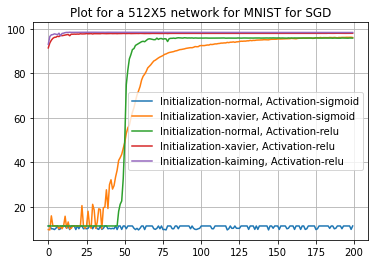

In [30]:
plt.plot(output1,label="Initialization-normal, Activation-sigmoid")
plt.plot(output2,label="Initialization-xavier, Activation-sigmoid")
plt.plot(output3,label="Initialization-normal, Activation-relu")
plt.plot(output4,label="Initialization-xavier, Activation-relu")
plt.plot(output5,label="Initialization-kaiming, Activation-relu")
plt.legend()
plt.grid()
plt.title("Plot for a 512X5 network for MNIST for SGD")

In [20]:
model1_adam=FiveLayer_NeuralNet_512_problem_3(input_size, hidden_size,'normal',num_classes,"sigmoid").cuda()
output_adam_l1=final_ouput("Adam",model1_adam,200,train_loader1,test_loader1,0.00005)

Epoch: 0 Loss: 2.248316109561717 accuracy: 19.11
Epoch: 1 Loss: 1.7886115208363482 accuracy: 29.68
Epoch: 2 Loss: 1.6574308658713726 accuracy: 33.87
Epoch: 3 Loss: 1.486262662832671 accuracy: 40.74
Epoch: 4 Loss: 1.3291080313196568 accuracy: 43.73
Epoch: 5 Loss: 1.2505998352189054 accuracy: 48.2
Epoch: 6 Loss: 1.1770867352038303 accuracy: 50.35
Epoch: 7 Loss: 1.0924140015390635 accuracy: 54.42
Epoch: 8 Loss: 1.0035716072836918 accuracy: 65.52
Epoch: 9 Loss: 0.8282970276468599 accuracy: 76.4
Epoch: 10 Loss: 0.6532812149667028 accuracy: 83.27
Epoch: 11 Loss: 0.5220836280251363 accuracy: 86.45
Epoch: 12 Loss: 0.4503895424322279 accuracy: 88.52
Epoch: 13 Loss: 0.4006916813568266 accuracy: 89.81
Epoch: 14 Loss: 0.3634582937462752 accuracy: 90.35
Epoch: 15 Loss: 0.33252357597798426 accuracy: 90.98
Epoch: 16 Loss: 0.30847025813578544 accuracy: 91.48
Epoch: 17 Loss: 0.28797471396196117 accuracy: 91.72
Epoch: 18 Loss: 0.2724373149020331 accuracy: 92.6
Epoch: 19 Loss: 0.2554232514838674 accuracy

In [22]:
model2_adam=FiveLayer_NeuralNet_512_problem_3(input_size, hidden_size,'xavier',num_classes,"sigmoid").cuda()
output_adam_l2=final_ouput("Adam",model2_adam,200,train_loader1,test_loader1,0.0001)

Epoch: 0 Loss: 1.5777322479656763 accuracy: 78.67
Epoch: 1 Loss: 0.5735482545549682 accuracy: 88.35
Epoch: 2 Loss: 0.3706225308972889 accuracy: 91.44
Epoch: 3 Loss: 0.2765247523625776 accuracy: 93.31
Epoch: 4 Loss: 0.21434267489577152 accuracy: 94.59
Epoch: 5 Loss: 0.17515213330830337 accuracy: 95.18
Epoch: 6 Loss: 0.14949875290809408 accuracy: 95.54
Epoch: 7 Loss: 0.1289582982667283 accuracy: 96.08
Epoch: 8 Loss: 0.11509499430402255 accuracy: 96.11
Epoch: 9 Loss: 0.09917825948534363 accuracy: 96.57
Epoch: 10 Loss: 0.08913585237427943 accuracy: 96.6
Epoch: 11 Loss: 0.07903251556485001 accuracy: 96.63
Epoch: 12 Loss: 0.07228427972676339 accuracy: 96.76
Epoch: 13 Loss: 0.06329778480385222 accuracy: 96.9
Epoch: 14 Loss: 0.057125905025273815 accuracy: 97.08
Epoch: 15 Loss: 0.052415101722415 accuracy: 96.96
Epoch: 16 Loss: 0.047637708765119 accuracy: 97.08
Epoch: 17 Loss: 0.04086200460624784 accuracy: 97.09
Epoch: 18 Loss: 0.03645941453761479 accuracy: 97.18
Epoch: 19 Loss: 0.03346836616320

In [23]:
model3_adam=FiveLayer_NeuralNet_512_problem_3(input_size, hidden_size,'normal',num_classes,"relu").cuda()
output_adam_l3=final_ouput("Adam",model3_adam,200,train_loader1,test_loader1,0.00001)

Epoch: 0 Loss: 1.788376568477037 accuracy: 59.64
Epoch: 1 Loss: 1.0082254428853359 accuracy: 67.34
Epoch: 2 Loss: 0.8992986147845986 accuracy: 71.89
Epoch: 3 Loss: 0.8183796268536337 accuracy: 76.77
Epoch: 4 Loss: 0.729142575820626 accuracy: 80.37
Epoch: 5 Loss: 0.6083848694367195 accuracy: 84.16
Epoch: 6 Loss: 0.5042614227673138 accuracy: 86.48
Epoch: 7 Loss: 0.4511347875983984 accuracy: 87.81
Epoch: 8 Loss: 0.417474916748909 accuracy: 88.67
Epoch: 9 Loss: 0.39102957682060535 accuracy: 89.65
Epoch: 10 Loss: 0.3685954048244684 accuracy: 90.21
Epoch: 11 Loss: 0.3489700240303458 accuracy: 90.65
Epoch: 12 Loss: 0.33093756470662444 accuracy: 90.99
Epoch: 13 Loss: 0.31427663580568105 accuracy: 91.32
Epoch: 14 Loss: 0.2994984262533534 accuracy: 91.82
Epoch: 15 Loss: 0.28474740963627787 accuracy: 92.09
Epoch: 16 Loss: 0.2719214967191855 accuracy: 92.3
Epoch: 17 Loss: 0.2594876805189322 accuracy: 92.57
Epoch: 18 Loss: 0.248353875172672 accuracy: 92.98
Epoch: 19 Loss: 0.23699712311662335 accura

In [24]:
model4_adam=FiveLayer_NeuralNet_512_problem_3(input_size, hidden_size,'xavier',num_classes,"relu").cuda()
output_adam_l4=final_ouput("Adam",model4,200,train_loader1,test_loader1,0.001)

Epoch: 0 Loss: 0.23834538156837365 accuracy: 96.82
Epoch: 1 Loss: 0.070653660022326 accuracy: 96.78
Epoch: 2 Loss: 0.058070609816657834 accuracy: 97.34
Epoch: 3 Loss: 0.049521932700104805 accuracy: 97.48
Epoch: 4 Loss: 0.04643982180842518 accuracy: 97.59
Epoch: 5 Loss: 0.04069744429733755 accuracy: 97.42
Epoch: 6 Loss: 0.038524990465476125 accuracy: 97.85
Epoch: 7 Loss: 0.03820910449869541 accuracy: 96.51
Epoch: 8 Loss: 0.03166367140999967 accuracy: 97.3
Epoch: 9 Loss: 0.034897784558512064 accuracy: 98.06
Epoch: 10 Loss: 0.02750180697237424 accuracy: 97.78
Epoch: 11 Loss: 0.026690724728341553 accuracy: 97.36
Epoch: 12 Loss: 0.02891452417324564 accuracy: 97.74
Epoch: 13 Loss: 0.024003369237622942 accuracy: 97.92
Epoch: 14 Loss: 0.025620455123376903 accuracy: 97.39
Epoch: 15 Loss: 0.025551311269523883 accuracy: 97.99
Epoch: 16 Loss: 0.019692661967012783 accuracy: 98.2
Epoch: 17 Loss: 0.015558836988340602 accuracy: 97.96
Epoch: 18 Loss: 0.024401373543597636 accuracy: 98.04
Epoch: 19 Loss:

In [25]:
model5_adam=FiveLayer_NeuralNet_512_problem_3(input_size, hidden_size,'Kaiming',num_classes,"relu").cuda()
output_adam_l5=final_ouput("Adam",model5_adam,200,train_loader1,test_loader1,0.001)

Epoch: 0 Loss: 0.27121571026472396 accuracy: 96.05
Epoch: 1 Loss: 0.11196620518893702 accuracy: 96.09
Epoch: 2 Loss: 0.0793761064741276 accuracy: 97.11
Epoch: 3 Loss: 0.0628752979273195 accuracy: 97.51
Epoch: 4 Loss: 0.0518661162573725 accuracy: 97.86
Epoch: 5 Loss: 0.04916566836464999 accuracy: 97.43
Epoch: 6 Loss: 0.041064118399525056 accuracy: 97.8
Epoch: 7 Loss: 0.03472912692510064 accuracy: 97.89
Epoch: 8 Loss: 0.036589750045188656 accuracy: 98.13
Epoch: 9 Loss: 0.03203309944185214 accuracy: 98.23
Epoch: 10 Loss: 0.02815560561669087 accuracy: 98.11
Epoch: 11 Loss: 0.02244611938944865 accuracy: 97.93
Epoch: 12 Loss: 0.022913727092573163 accuracy: 97.69
Epoch: 13 Loss: 0.02697760071800297 accuracy: 98.17
Epoch: 14 Loss: 0.018837659227545 accuracy: 98.21
Epoch: 15 Loss: 0.018770665014947965 accuracy: 98.2
Epoch: 16 Loss: 0.018628517528267035 accuracy: 98.21
Epoch: 17 Loss: 0.019410983148202644 accuracy: 97.97
Epoch: 18 Loss: 0.01808692309236952 accuracy: 97.85
Epoch: 19 Loss: 0.01874

Text(0.5, 1.0, 'Plot for a 512X5 network for MNIST for ADAM')

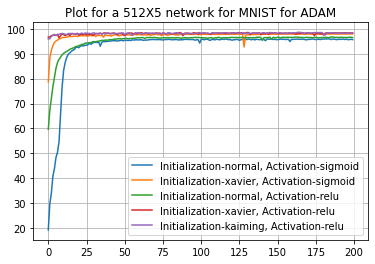

In [29]:
plt.plot(output_adam_l1,label="Initialization-normal, Activation-sigmoid")
plt.plot(output_adam_l2,label="Initialization-xavier, Activation-sigmoid")
plt.plot(output_adam_l3,label="Initialization-normal, Activation-relu")
plt.plot(output_adam_l4,label="Initialization-xavier, Activation-relu")
plt.plot(output_adam_l5,label="Initialization-kaiming, Activation-relu")
plt.legend()
plt.grid()
plt.title("Plot for a 512X5 network for MNIST for ADAM")